In [1]:
import numpy as np
np.random.seed(0)
import time
from matplotlib import pyplot as plt

In [2]:
data = np.loadtxt("train",encoding='cp1252')

In [3]:
X = np.array(data[0:800,1:data.shape[1]])
Y = np.array(data[0:800,0])
Y = Y.reshape(-1,1)

In [4]:
#Square loss function f(w) = ||Xw-y||^2
#gradient of loss = 2*X^T(Xw-y)
#func_value = 'f' and #grad_value = 'g'
def loss_function(X,w,Y,i):
    #indicator to indicate if we want the function or its gradient 
    loss = X@w-Y
    if i =='f':
        sq_loss = loss.T@loss
        return sq_loss
    if i=='g':
        grad = X.T@loss
        return 2*grad



In [5]:
#objective function g(w) = loss function + L1norm(w)
def objective_function(X,w,Y):
    fun = np.sum(np.abs(w)) + loss_function(X,w,Y,'f').item()
    return fun

In [6]:
#subgradient of L1 norm
def subgradL1(w):
    subgrad = np.zeros([1000,1])
    for i in range(1000):
        if w[i,0]<0:
            subgrad[i,0] = -1
        elif w[i,0] == 0:
            subgrad[i,0] = -1;
        else:
            subgrad[i,0] = 1;
            
    return subgrad

In [7]:
#Primal Subgradient Descent update
def PSD(w_prev,t,learningRate,X,Y):
    l_rate = learningRate/np.sqrt(t+1)
    subgradient = subgradL1(w_prev) + loss_function(X,w_prev,Y,'g')
    w_new = w_prev - l_rate*subgradient
    return w_new
       

In [16]:
def optimization(X,Y,learningRate,iterations,w_initial,batchsize,timecap):
    
    w_prev = w_initial
    w_new = w_initial 
    objval = []
    timeSeries = []
    totaltime = 0
    
    for itr in range(iterations):
        
        tic = time.perf_counter()
        
        minibatches = minibatch(X,Y,batchsize)
        
        curr_objvalue = 0
        for mini_batch in minibatches:
            X_mini, Y_mini = mini_batch
            w_new = PSD(w_prev,itr,learningRate,X_mini,Y_mini)
            w_prev = w_new
            curr_objvalue += objective_function(X_mini,w_new,Y_mini)
        
        objval.append(curr_objvalue.flatten())
            
        
        toc = time.perf_counter()
        
        totaltime = totaltime + (toc-tic)
        
        
        
        timeSeries.append(totaltime)
        
        if totaltime > timecap:
            break
        
    return(w_new,objval,timeSeries)    

In [9]:
#Create mini batches
def minibatch(X,Y,batchsize):
    
    mini_batches = []
    dat = np.hstack((X,Y))
    np.random.shuffle(dat)
    n_minibatches = dat.shape[0]//batchsize
    
    i = 0
    
    for i in range(n_minibatches + 1):
        mini_batch = dat[i*batchsize:(i+1)*batchsize,:]
        X_mini = mini_batch[:,1:]
        Y_mini = mini_batch[:,0].reshape((-1,1))
        mini_batches.append((X_mini,Y_mini))
        
        if dat.shape[0]%batchsize!= 0:
            mini_batch = dat[i*batchsize:dat.shape[0]]
            X_mini = mini_batch[:,1:]
            Y_mini = mini_batch[:,0].reshape((-1,1))
            mini_batches.append((X_mini,Y_mini))
        
    return mini_batches

[19.54400341]
5.009168296999633


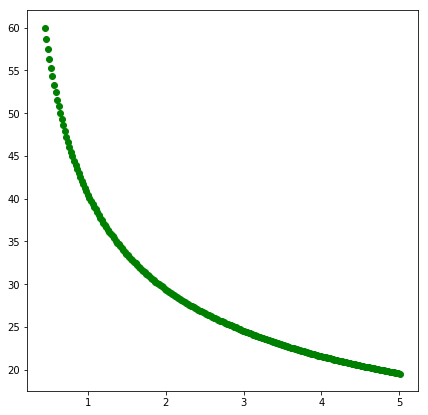

In [17]:
iterations = 50000
w_initial = np.random.rand(1000,1)
learningRate = 0.02
batchsize = 32
timecap = 5

(w_final,objval, timeSeries)= optimization(X,Y,learningRate,iterations,w_initial,batchsize,timecap)

iters = [i for i in range(1000)]
#for i in range(1000):
#    print(objval[i])
print(objval[-1])
print(timeSeries[-1])
plt.figure(figsize=(7,7))
plt.plot(timeSeries[20:], objval[20:], 'go');